[View in Colaboratory](https://colab.research.google.com/github/avs20/GNoidaMLBatch/blob/master/KaggleNYCFareChallenge.ipynb)

https://www.kaggle.com/c/ga-customer-revenue-prediction

Kaggle competition on google revenue prediction

## Code to download the kaggle dataset


In [0]:
!mkdir .kaggle

Replace hidden values with values from your json file. 

In [0]:
import json
token = {"username":"hidden","key":"hidden"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [23]:
# !kaggle config set -n path -v{/content}

- path is now set to: {/content}


Download the dataset directly into colab

In [24]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

  0% 0.00/335k [00:00<?, ?B/s]
100% 335k/335k [00:00<00:00, 59.3MB/s]
  0% 0.00/960k [00:00<?, ?B/s]
100% 960k/960k [00:00<00:00, 84.6MB/s]
100% 1.56G/1.56G [00:15<00:00, 134MB/s]
100% 1.56G/1.56G [00:15<00:00, 107MB/s]
  0% 0.00/486 [00:00<?, ?B/s]
100% 486/486 [00:00<00:00, 627kB/s]


In [0]:
# !mv ./\{/content\}/competitions/new-york-city-taxi-fare-prediction/train.csv.zip ./train.csv.zip

In [54]:
!unzip train.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [55]:
# get the total number of lines
!wc -l train.csv

55423856 train.csv


In [56]:
!head train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [57]:
!tail train.csv

2010-05-28 07:49:50.0000002,11.7,2010-05-28 07:49:50 UTC,-73.947156,40.780228,-73.976806,40.758867,2
2011-09-16 00:46:43.0000005,6.1,2011-09-16 00:46:43 UTC,-73.990946,40.736619,-73.992298,40.740316,3
2013-05-24 00:13:36.0000004,6,2013-05-24 00:13:36 UTC,-73.993488,40.747372,-73.998436,40.73046,1
2014-03-04 22:25:01.0000002,12,2014-03-04 22:25:01 UTC,-73.983015,40.745082,-73.954176,40.767337,1
2015-03-22 16:37:27.0000003,4.5,2015-03-22 16:37:27 UTC,-73.9810562133789,40.737457275390625,-73.9854736328125,40.729297637939453,1
2014-03-15 03:28:00.00000070,14,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.96328,40.762555,1
2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20 UTC,-73.957784,40.76553,-73.95164,40.773959,1
2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24 UTC,-73.970505,40.752325,-73.960537,40.797342,1
2011-10-26 05:57:51.0000002,28.900000000000002,2011-10-26 05:57:51 UTC,-73.980901,40.764629,-73.870605,40.773963,1
2014-12-12 11:33:00.00000015,7.5,2014-12-12 11:33:00 UTC,-

## Reading the data file in python

In [0]:
import pandas as pd 
import numpy as np 

In [30]:
%time df_raw = pd.read_csv('train.csv')

ParserError: ignored

Add the datatypes of different columns so that it's direct for pandas to download

In [0]:
types = {
    'fare_amount' : 'float32',
    'pickup_datetime':'str',
    'pickup_longitude' : 'float32',
    'pickup_latitude' : 'float32',
    'dropoff_latitude' : 'float32',
    'dropoff_longitude' : 'float32',
    'passenger_count':'uint8'
    
}

cols = list(types.keys())

In [51]:
cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_latitude',
 'dropoff_longitude',
 'passenger_count']

In [46]:
%time df_raw = pd.read_csv('train.csv', dtype=types, nrows=5)
df_raw.head()

CPU times: user 7.53 ms, sys: 818 µs, total: 8.35 ms
Wall time: 10.5 ms


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844315,40.721317,-73.841614,40.712276,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016045,40.711304,-73.979271,40.782005,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982735,40.761269,-73.991241,40.750561,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987129,40.733143,-73.991570,40.758091,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968094,40.768009,-73.956657,40.783764,1


Load in chunks of 5 million

In [60]:
%%time
from tqdm import tqdm



df_list = [] # list to hold the batch dataframe

chunksize = 5_000_000 # 5 million rows at one go. Or try 10 million



for df_chunk in tqdm(pd.read_csv('./train.csv', usecols=cols, dtype=types, chunksize=chunksize)):
     
    # Neat trick from https://www.kaggle.com/btyuhas/bayesian-optimization-with-xgboost
    # Using parse_dates would be much slower!
    df_chunk['pickup_datetime'] = df_chunk['pickup_datetime'].str.slice(0, 16)
    df_chunk['pickup_datetime'] = pd.to_datetime(df_chunk['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M')
    
    # Can process each chunk of dataframe here
    # clean_data(), feature_engineer(),fit()
    
    # Alternatively, append the chunk to list and merge all
    df_list.append(df_chunk) 





0it [00:00, ?it/s]



1it [00:13, 13.43s/it]



2it [00:26, 13.31s/it]



3it [00:39, 13.18s/it]



4it [00:53, 13.35s/it]



5it [01:06, 13.23s/it]



6it [01:18, 13.13s/it]



7it [01:31, 13.05s/it]



8it [01:44, 13.05s/it]



9it [01:57, 12.88s/it]



10it [02:09, 12.70s/it]



11it [02:22, 12.62s/it]



12it [02:23,  9.15s/it]





CPU times: user 2min 11s, sys: 7.85 s, total: 2min 19s
Wall time: 2min 23s


In [61]:
# Merge all dataframes into one dataframe
train_df = pd.concat(df_list)

# Delete the dataframe list to release memory
del df_list

# See what we have loaded
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 7 columns):
fare_amount          float32
pickup_datetime      datetime64[ns, UTC]
pickup_longitude     float32
pickup_latitude      float32
dropoff_longitude    float32
dropoff_latitude     float32
passenger_count      uint8
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 1.5 GB


In [62]:
train_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:00+00:00,-73.844315,40.721317,-73.841614,40.712276,1
1,16.9,2010-01-05 16:52:00+00:00,-74.016045,40.711304,-73.979271,40.782005,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2
3,7.7,2012-04-21 04:30:00+00:00,-73.987129,40.733143,-73.991570,40.758091,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764,1


In [63]:
train_df.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
55423851,14.0,2014-03-15 03:28:00+00:00,-74.005272,40.740028,-73.963280,40.762554,1
55423852,4.2,2009-03-24 20:46:00+00:00,-73.957787,40.765530,-73.951637,40.773960,1
55423853,14.1,2011-04-02 22:04:00+00:00,-73.970505,40.752323,-73.960541,40.797340,1
55423854,28.9,2011-10-26 05:57:00+00:00,-73.980904,40.764629,-73.870605,40.773964,1
55423855,7.5,2014-12-12 11:33:00+00:00,-73.969719,40.797668,-73.970886,40.783314,1


In [0]:
!mv ./\{/content\}/competitions/new-york-city-taxi-fare-prediction/test.csv ./test.csv

In [65]:
!wc -l test.csv

9914 test.csv


In [66]:
!head test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [70]:
test_df = pd.read_csv('test.csv',dtype=types, parse_dates=['pickup_datetime'])
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966049,40.789776,-73.988564,40.744427,1


In [73]:
train_df.describe(include="all")

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,55423856,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
unique,NaN,3358837,NaN,NaN,NaN,NaN,NaN
top,NaN,2013-11-03 01:09:00+00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,91,NaN,NaN,NaN,NaN,NaN
mean,1.134503e+01,NaN,-7.250972e+01,3.991985e+01,-7.251106e+01,3.992067e+01,1.685380e+00
std,2.071083e+01,NaN,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,NaN,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,NaN,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,NaN,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,NaN,-7.396708e+01,4.076713e+01,-7.396368e+01,4.076810e+01,2.000000e+00


In [74]:
test_df.describe(include="all")

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914,9914,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
unique,9914,1753,NaN,NaN,NaN,NaN,NaN
top,2014-04-14 13:48:32.0000001,2011-12-13 22:00:00,NaN,NaN,NaN,NaN,NaN
freq,1,270,NaN,NaN,NaN,NaN,NaN
first,NaN,2009-01-01 11:04:24,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-06-30 20:03:50,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,NaN,NaN,0.042774,0.033541,0.039072,0.035435,1.278747
min,NaN,NaN,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,NaN,NaN,-73.992500,40.736125,-73.991249,40.735253,1.000000


What all the above tells us is that the data is randomized for dates. There is no order in the date. 

In [77]:
train_df.fare_amount.idxmax()

41032263

In [79]:
train_df.drop(train_df.index[41032263], inplace=True)
train_df.fare_amount.describe()

count    5.542386e+07
mean     1.134333e+01
std      1.642179e+01
min     -3.000000e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      7.574702e+04
Name: fare_amount, dtype: float64

In [80]:
train_df.fare_amount.idxmax()

41186018

In [81]:
train_df.drop(train_df.index[41186018], inplace=True)
train_df.fare_amount.describe()

count    5.542385e+07
mean     1.134334e+01
std      1.642179e+01
min     -3.000000e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      7.574702e+04
Name: fare_amount, dtype: float64

In [83]:
train_sample = train_df.sample(n=500_000)
train_sample.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
3988320,13.5,2013-04-06 20:23:00+00:00,-73.984344,40.737457,-73.997612,40.713654,1
10399464,8.5,2014-06-05 07:19:00+00:00,-73.964050,40.767731,-73.955017,40.769138,1
49747961,5.3,2011-06-18 15:42:00+00:00,-73.985909,40.757824,-73.992012,40.745064,1
36333537,48.0,2010-12-16 03:03:00+00:00,-73.980797,40.759983,-74.015137,40.765476,1
2289702,7.5,2013-02-24 10:46:00+00:00,-73.990356,40.714207,-73.993263,40.727848,1


In [86]:
%time train_sample.describe(include='all')

CPU times: user 423 ms, sys: 9.69 ms, total: 433 ms
Wall time: 436 ms


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,500000.000000,500000,500000.000000,500000.000000,499996.000000,499996.000000,500000.000000
unique,NaN,448922,NaN,NaN,NaN,NaN,NaN
top,NaN,2009-04-20 15:25:00+00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,NaN,NaN,NaN,NaN,NaN
mean,11.329736,NaN,-72.518806,39.930515,-72.501778,39.933300,1.682902
std,9.840994,NaN,12.126853,10.388541,13.700747,8.939886,1.369792
min,-52.000000,NaN,-3362.332031,-2875.693604,-2593.367676,-1160.217285,0.000000
25%,6.000000,NaN,-73.992073,40.734901,-73.991425,40.734070,1.000000
50%,8.500000,NaN,-73.981819,40.752689,-73.980148,40.753220,1.000000
75%,12.500000,NaN,-73.967133,40.767143,-73.963676,40.768169,2.000000


In [0]:
from sklearn.model_selection import train_test_split

In [90]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 3988320 to 51071462
Data columns (total 7 columns):
fare_amount          500000 non-null float32
pickup_datetime      500000 non-null datetime64[ns, UTC]
pickup_longitude     500000 non-null float32
pickup_latitude      500000 non-null float32
dropoff_longitude    499996 non-null float32
dropoff_latitude     499996 non-null float32
passenger_count      500000 non-null uint8
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 37.6 MB


In [91]:
X = train_sample.drop('fare_amount', axis=1)
y = train_sample.fare_amount

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42)

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(400000, 6)
(100000, 6)
(400000,)
(100000,)


In [92]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)

model.fit(train_X, train_y)

print(model.score(test_X, test_y))

TypeError: ignored

In [0]:
train_sample.pickup_datetime = train_sample.pickup_datetime.astype(int)

In [95]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 3988320 to 51071462
Data columns (total 7 columns):
fare_amount          500000 non-null float32
pickup_datetime      500000 non-null int64
pickup_longitude     500000 non-null float32
pickup_latitude      500000 non-null float32
dropoff_longitude    499996 non-null float32
dropoff_latitude     499996 non-null float32
passenger_count      500000 non-null uint8
dtypes: float32(5), int64(1), uint8(1)
memory usage: 37.6 MB


In [96]:
X = train_sample.drop('fare_amount', axis=1)
y = train_sample.fare_amount

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42)

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(400000, 6)
(100000, 6)
(400000,)
(100000,)


In [97]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)

model.fit(train_X, train_y)

print(model.score(test_X, test_y))

ValueError: ignored

In [164]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499996 entries, 3988320 to 51071462
Data columns (total 7 columns):
fare_amount          499996 non-null float32
pickup_datetime      499996 non-null int64
pickup_longitude     499996 non-null float32
pickup_latitude      499996 non-null float32
dropoff_longitude    499996 non-null float32
dropoff_latitude     499996 non-null float32
passenger_count      499996 non-null uint8
dtypes: float32(5), int64(1), uint8(1)
memory usage: 37.6 MB


In [165]:

train_sample.dropna(inplace=True)
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499996 entries, 3988320 to 51071462
Data columns (total 7 columns):
fare_amount          499996 non-null float32
pickup_datetime      499996 non-null int64
pickup_longitude     499996 non-null float32
pickup_latitude      499996 non-null float32
dropoff_longitude    499996 non-null float32
dropoff_latitude     499996 non-null float32
passenger_count      499996 non-null uint8
dtypes: float32(5), int64(1), uint8(1)
memory usage: 17.6 MB


In [166]:
X = train_sample.drop('fare_amount', axis=1)
y = train_sample.fare_amount

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42)

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(399996, 6)
(100000, 6)
(399996,)
(100000,)


In [101]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)

model.fit(train_X, train_y)

print(model.score(test_X, test_y))

0.7313104975603646


In [0]:
def rmse(model, preds):
  return np.sqrt(np.mean((model.predict(test_X) - test_y)**2))

def print_score(model):
  print ((model.score(test_X, test_y), rmse(model,test_y)))

In [106]:
print_score(model)

(0.7313104975603646, 5.092867640496611)

In [109]:
final_test_df = pd.read_csv('test.csv', parse_dates=['pickup_datetime'])
final_test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1


In [0]:
key = final_test_df.key
final_test_df.drop('key',axis=1, inplace=True)
final_test_df.pickup_datetime = final_test_df.pickup_datetime.astype('int')


In [0]:
def get_submission_file(model):
  preds = model.predict(final_test_df)
  file_data = {'key':key, 'fare_amount':preds}
  to_df = pd.DataFrame(file_data)
  to_df.to_csv('submission_file.csv', index=False)

In [0]:
get_submission_file(model)

In [122]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f subimission_file.csv -m "test_subimission"

Successfully submitted to New York City Taxi Fare Prediction

In [125]:
model2 = RandomForestRegressor(n_jobs=-1, n_estimators=20)

model2.fit(train_X, train_y)

print(print_score(model2))

get_submission_file(model2)

!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_file.csv -m "test_subimission"

Successfully submitted to New York City Taxi Fare Prediction

In [127]:
print(print_score(model2))

(0.7290236961977075, 5.114494278370205)


In [128]:
model2 = RandomForestRegressor(n_jobs=-1, n_estimators=10, max_depth=4)

model2.fit(train_X, train_y)

print(print_score(model2))

get_submission_file(model2)

!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_file.csv -m "test_subimission"

(0.5514685916528586, 6.580114786905964)
Successfully submitted to New York City Taxi Fare Prediction

In [129]:
model2 = RandomForestRegressor(n_jobs=-1, n_estimators=10, max_features=0.5)

model2.fit(train_X, train_y)

print(print_score(model2))

get_submission_file(model2)

!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_file.csv -m "test_subimission"

(0.7347248666915019, 5.060405400393513)
Successfully submitted to New York City Taxi Fare Prediction

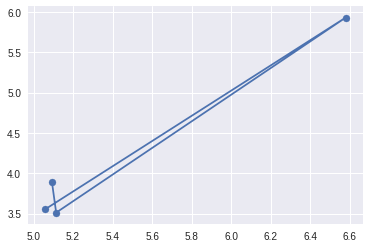

In [135]:
x = [5.060405400393513,6.580114786905964,5.114494278370205,5.092867640496611]
y = [3.55528, 5.92957, 3.51156,3.89396]


import matplotlib.pyplot as plt 
%matplotlib inline 

plt.scatter(x,y)
plt.plot(x,y,'-')



Now let's talk about the features of the dataset

In [136]:
model.feature_importances_

array([0.08903403, 0.23252087, 0.12317962, 0.40685529, 0.14179538,
       0.0066148 ])

In [0]:
feature_labels = train_sample.columns

In [140]:
for feature in zip(feature_labels, model.feature_importances_):
  print(feature)


('fare_amount', 0.08903403461737179)
('pickup_datetime', 0.23252087281650596)
('pickup_longitude', 0.12317962028615481)
('pickup_latitude', 0.40685528827026296)
('dropoff_longitude', 0.14179538379498777)
('dropoff_latitude', 0.006614800214716704)


Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

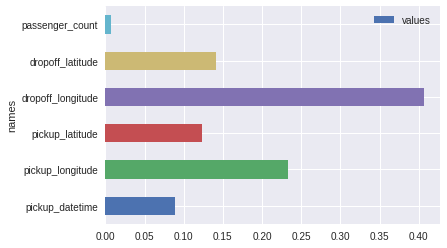

In [150]:
fi_data = pd.DataFrame({'names':feature_labels[1:],'values':model.feature_importances_})
fi_data.plot('names','values','barh')

What if we drop passenger count?


In [151]:
print_score(model)

(0.7313104975603646, 5.092867640496611)

In [167]:
tr_x = train_X.copy().drop('passenger_count', axis=1)
te_x = test_X.copy().drop('passenger_count',axis=1)



model.fit(tr_x, train_y)

print(model.score(te_x, test_y))

def rmse2(model,data):
  return np.sqrt(np.mean((model.predict(data) - test_y)**2))

rmse2(model, te_x)

0.7134556259755795


5.259361014617751

In [171]:
!pip install git+https://github.com/fastai/fastai.git

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-inso50fm
    100% |████████████████████████████████| 1.5MB 5.5MB/s 
    100% |████████████████████████████████| 112kB 11.2MB/s 
    100% |████████████████████████████████| 184kB 8.5MB/s 
    100% |████████████████████████████████| 3.6MB 8.5MB/s 
    100% |████████████████████████████████| 496.4MB 27kB/s 
    100% |████████████████████████████████| 51kB 9.9MB/s 
    100% |████████████████████████████████| 61kB 20.1MB/s 
    100% |████████████████████████████████| 2.2MB 1.0MB/s 
    100% |████████████████████████████████| 11.6MB 1.0MB/s 
    100% |████████████████████████████████| 92kB 16.4MB/s 
    100% |████████████████████████████████| 112kB 22.7MB/s 
    100% |████████████████████████████████| 71kB 23.0MB/s 
    100% |████████████████████████████████| 901kB 1.2MB/s 
    100% |████████████████████████████████| 81kB 18.1MB/s 
    100% |████████████████████████████████| 4.4MB 1.5MB/s 
    100% |████████████████████████

In [0]:
%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [0]:
set_rf_samples(50000)

In [174]:
model = RandomForestRegressor(n_estimators=10, max_depth = 5, n_jobs=-1)
model.fit(train_X, train_y)

print(model.score(test_X,test_y), rmse2(model,test_X))

0.5983951484768332 6.226392798130427


In [175]:
model = RandomForestRegressor(n_estimators=20, max_depth = 5, n_jobs=-1)
model.fit(train_X, train_y)

print(model.score(test_X,test_y), rmse2(model,test_X))

0.6050988097014962 6.174208071954948


In [177]:
model = RandomForestRegressor(n_estimators=50, max_depth = 5, n_jobs=-1)
model.fit(train_X, train_y)

print(model.score(test_X,test_y), rmse2(model,test_X))

0.6030683567751784 6.190060601501413


In [178]:
model = RandomForestRegressor(n_estimators=20, max_depth = 50, n_jobs=-1)
model.fit(train_X, train_y)

print(model.score(test_X,test_y), rmse2(model,test_X))

0.7645436884428818 4.767516535875388


In [179]:
model = RandomForestRegressor(n_estimators=20, max_depth = 40, n_jobs=-1)
model.fit(train_X, train_y)

print(model.score(test_X,test_y), rmse2(model,test_X))

0.761006705124981 4.803191457296709


In [181]:
model = RandomForestRegressor(n_estimators=20, max_depth = 40,max_features=0.3, n_jobs=-1)
model.fit(train_X, train_y)

print(model.score(test_X,test_y), rmse2(model,test_X))

0.7345346290495725 5.062219567910885


In [182]:
model = RandomForestRegressor(n_estimators=20, max_depth = 40,max_features=0.5, n_jobs=-1)
model.fit(train_X, train_y)

print(model.score(test_X,test_y), rmse2(model,test_X))

0.7656685420056778 4.756114891568655


In [183]:
model = RandomForestRegressor(n_estimators=20, max_depth = 40,max_features=0.8, n_jobs=-1)
model.fit(train_X, train_y)

print(model.score(test_X,test_y), rmse2(model,test_X))

0.7614260494688463 4.798975699933606


In [184]:
model = RandomForestRegressor(n_estimators=20,min_samples_leaf=500, max_depth = 40,max_features=0.5, n_jobs=-1)
model.fit(train_X, train_y)

print(model.score(test_X,test_y), rmse2(model,test_X))

0.5868592692677728 6.315184548759006


In [185]:
model = RandomForestRegressor(n_estimators=20,min_samples_leaf=100, max_depth = 40,max_features=0.5, n_jobs=-1)
model.fit(train_X, train_y)

print(model.score(test_X,test_y), rmse2(model,test_X))

0.6991077570054101 5.389426279362802


In [186]:
model = RandomForestRegressor(n_estimators=20,min_samples_leaf=50, max_depth = 40,max_features=0.5, n_jobs=-1)
model.fit(train_X, train_y)

print(model.score(test_X,test_y), rmse2(model,test_X))

0.7277472331734083 5.126526313166758


In [187]:
model = RandomForestRegressor(n_estimators=20,min_samples_leaf=10, max_depth = 40,max_features=0.5, n_jobs=-1)
model.fit(train_X, train_y)

print(model.score(test_X,test_y), rmse2(model,test_X))

0.7586514302000252 4.826801117455449


In [188]:
model = RandomForestRegressor(n_estimators=20,min_samples_leaf=5, max_depth = 40,max_features=0.5, n_jobs=-1)
model.fit(train_X, train_y)

print(model.score(test_X,test_y), rmse2(model,test_X))

0.7659362249465296 4.753397598247137


In [189]:
model = RandomForestRegressor(n_estimators=20,min_samples_leaf=3, max_depth = 40,max_features=0.5, n_jobs=-1)
model.fit(train_X, train_y)

print(model.score(test_X,test_y), rmse2(model,test_X))

0.7669647921382615 4.7429419608875625


In [0]:
get_submission_file(model)

In [192]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_file.csv -m "random_forest"

Successfully submitted to New York City Taxi Fare Prediction

In [0]:
??add_datepart()

In [0]:
add_datepart(train_sample,'pickup_datetime',time=True)

In [195]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499996 entries, 3988320 to 51071462
Data columns (total 22 columns):
fare_amount                        499996 non-null float32
pickup_longitude                   499996 non-null float32
pickup_latitude                    499996 non-null float32
dropoff_longitude                  499996 non-null float32
dropoff_latitude                   499996 non-null float32
passenger_count                    499996 non-null uint8
pickup_datetimeYear                499996 non-null int64
pickup_datetimeMonth               499996 non-null int64
pickup_datetimeWeek                499996 non-null int64
pickup_datetimeDay                 499996 non-null int64
pickup_datetimeDayofweek           499996 non-null int64
pickup_datetimeDayofyear           499996 non-null int64
pickup_datetimeIs_month_end        499996 non-null bool
pickup_datetimeIs_month_start      499996 non-null bool
pickup_datetimeIs_quarter_end      499996 non-null bool
pickup_datetimeIs_q

In [196]:
X = train_sample.drop('fare_amount', axis=1)
y = train_sample.fare_amount

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42)

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(399996, 21)
(100000, 21)
(399996,)
(100000,)


In [197]:
model = RandomForestRegressor(n_estimators=20,min_samples_leaf=3, max_depth = 40,max_features=0.5, n_jobs=-1)
model.fit(train_X, train_y)

print(model.score(test_X,test_y), rmse2(model,test_X))

0.7624492558310578 4.788673613933393


# Assignment 

1. Add a column for distance calculation 
2. Check model performance with it? Does it increase / decrease?
3. Can you add any more columns?
4. Think about how else you can check feature importance.